<a href="https://colab.research.google.com/github/enzocarvs/TelecomX/blob/main/TelecomX_BR_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [8]:
!git clone https://github.com/enzocarvs/TelecomX

fatal: destination path 'TelecomX' already exists and is not an empty directory.


In [9]:
import pandas as pd

In [10]:
import requests


In [11]:
!pip install requests

In [12]:
import ast


#🔧 Transformação

In [13]:
# 1) Ler o JSON original
df = pd.read_json('/content/TelecomX_Data.json')  # coloque o nome do seu arquivo aqui

In [14]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [15]:
# 2) Converter colunas que são strings de dicionários para dict de verdade
for col in ['customer', 'phone', 'internet', 'account']:
    if col in df.columns and df[col].notna().any() and isinstance(df[col].dropna().iloc[0], str):
        df[col] = df[col].apply(ast.literal_eval)

In [16]:
# 3) Achatar (flatten) as colunas aninhadas
df_flat = pd.json_normalize(df.to_dict('records'), sep='.')

In [17]:
# 4) Ver resultado
print(df_flat.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [19]:
list(df.columns)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [20]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [21]:
df.columns.tolist()


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [22]:
df = pd.json_normalize(df.to_dict('records'), sep='.')

In [23]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [24]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [25]:
colunas_relevantes = ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total',
'Churn'  # variável alvo
]
df_relevante = df[colunas_relevantes]
df_relevante.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Churn
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [26]:
df_relevante.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [27]:
# Converter Total Charges para float
df_relevante['account.Charges.Total'] = pd.to_numeric(df_relevante['account.Charges.Total'], errors='coerce')


/tmp/ipython-input-1132765850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante['account.Charges.Total'] = pd.to_numeric(df_relevante['account.Charges.Total'], errors='coerce')


In [28]:
df_relevante.loc[:, 'account.Charges.Total'] = pd.to_numeric(
    df_relevante['account.Charges.Total'], errors='coerce'
)

In [29]:
df_relevante.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [30]:
df_relevante = df_relevante.copy()
df_relevante['Churn'] = df_relevante['Churn'].replace({'Yes': 1, 'No': 0})

In [31]:
df_relevante = df_relevante.loc[:, ~df_relevante.columns.duplicated()]


In [32]:
df_relevante.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [33]:
df_relevante['Churn'].value_counts(normalize=True)


,proportion
Churn,
0,0.711986
1,0.257190
,0.030824


In [34]:
df_relevante.groupby('Churn')[['account.Charges.Monthly',
                                'account.Charges.Total',
                                'customer.tenure']].mean()

,account.Charges.Monthly,account.Charges.Total,customer.tenure
Churn,,,
0,61.265124,2555.344141,37.569965
1,74.441332,1531.796094,17.979133
,63.412277,2196.933705,31.571429


In [35]:
# Remover colunas duplicadas
df_relevante = df_relevante.loc[:, ~df_relevante.columns.duplicated()].copy()

# Padronizar a coluna Churn para string e remover espaços
df_relevante['Churn'] = df_relevante['Churn'].astype(str).str.strip()

# Substituir valores Yes/No por 1/0
df_relevante['Churn'] = df_relevante['Churn'].replace({'Yes': 1, 'No': 0})

# Converter para int, ignorando valores inválidos
df_relevante['Churn'] = pd.to_numeric(df_relevante['Churn'], errors='coerce').astype('Int64')

# Conferir valores únicos
print(df_relevante['Churn'].unique())

<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [36]:
df_relevante['Churn'].isna().sum()

np.int64(224)

In [37]:
df_relevante = df_relevante.dropna(subset=['Churn']).copy()

In [38]:
df_relevante['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


In [39]:
for col in ['customer.gender', 'customer.Partner', 'customer.Dependents',
            'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
            'internet.OnlineSecurity', 'internet.OnlineBackup',
            'internet.DeviceProtection', 'internet.TechSupport',
            'internet.StreamingTV', 'internet.StreamingMovies',
            'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']:
    print(f"\n--- {col} ---")
    print(df_relevante.groupby(col)['Churn'].mean())


--- customer.gender ---
customer.gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: Float64

--- customer.Partner ---
customer.Partner
No      0.32958
Yes    0.196649
Name: Churn, dtype: Float64

--- customer.Dependents ---
customer.Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: Float64

--- phone.PhoneService ---
phone.PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: Float64

--- phone.MultipleLines ---
phone.MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: Float64

--- internet.InternetService ---
internet.InternetService
DSL            0.189591
Fiber optic    0.418928
No              0.07405
Name: Churn, dtype: Float64

--- internet.OnlineSecurity ---
internet.OnlineSecurity
No                     0.417667
No internet service     0.07405
Yes                    0.146112
Name: Churn, dtype: Float64

--- internet.OnlineBackup ---
internet.OnlineBackup
No               

# Verificando Inconsistências nos Dados

In [40]:
df_relevante.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [41]:
df_relevante.duplicated().sum()


np.int64(0)

In [42]:
# 3. Valores únicos nas colunas categóricas
print("\n🔹 Valores únicos por coluna categórica:\n")
for col in df_relevante.select_dtypes(include='object').columns:
    print(f"\n{col}:", df_relevante[col].unique())


🔹 Valores únicos por coluna categórica:


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

customer.gender: ['Female' 'Male']

customer.Partner: ['Yes' 'No']

customer.Dependents: ['Yes' 'No']

phone.PhoneService: ['Yes' 'No']

phone.MultipleLines: ['No' 'Yes' 'No phone service']

internet.InternetService: ['DSL' 'Fiber optic' 'No']

internet.OnlineSecurity: ['No' 'Yes' 'No internet service']

internet.OnlineBackup: ['Yes' 'No' 'No internet service']

internet.DeviceProtection: ['No' 'Yes' 'No internet service']

internet.TechSupport: ['Yes' 'No' 'No internet service']

internet.StreamingTV: ['Yes' 'No' 'No internet service']

internet.StreamingMovies: ['No' 'Yes' 'No internet service']

account.Contract: ['One year' 'Month-to-month' 'Two year']

account.PaperlessBilling: ['Yes' 'No']

account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [43]:
# 4. Estatísticas descritivas para colunas numéricas
print("\n🔹 Estatísticas das colunas numéricas:\n")
print(df_relevante.select_dtypes(include=['float64', 'int64', 'Int64']).describe())


🔹 Estatísticas das colunas numéricas:

          Churn  customer.SeniorCitizen  customer.tenure  \
count    7043.0             7043.000000      7043.000000   
mean    0.26537                0.162147        32.371149   
std    0.441561                0.368612        24.559481   
min         0.0                0.000000         0.000000   
25%         0.0                0.000000         9.000000   
50%         0.0                0.000000        29.000000   
75%         1.0                0.000000        55.000000   
max         1.0                1.000000        72.000000   

       account.Charges.Monthly  account.Charges.Total  
count              7043.000000            7032.000000  
mean                 64.761692            2283.300441  
std                  30.090047            2266.771362  
min                  18.250000              18.800000  
25%                  35.500000             401.450000  
50%                  70.350000            1397.475000  
75%                  89.850

# **Tratando as Inconsistências**

In [44]:
df_relevante.loc[df_relevante['account.Charges.Total'].isnull(), 'account.Charges.Total'] = 0


In [45]:
cols_no_internet = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
cols_no_phone = ['phone.MultipleLines']

# Substituir "No internet service" por "No"
df_relevante[cols_no_internet] = df_relevante[cols_no_internet].replace('No internet service', 'No')

# Substituir "No phone service" por "No"
df_relevante[cols_no_phone] = df_relevante[cols_no_phone].replace('No phone service', 'No')

In [46]:
df_relevante['Churn'] = df_relevante['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

In [47]:
print(df_relevante.isnull().sum())  # Todos devem ser 0
print("\nValores únicos após limpeza:\n")
for col in df_relevante.select_dtypes(include='object').columns:
    print(f"{col}: {df_relevante[col].unique()}")

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Valores únicos após limpeza:

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes']
internet.InternetService: ['DSL' 'Fiber o

# **Coluna de Contas Diárias**

In [48]:
# Criar coluna Contas_Diarias
df_relevante['Contas_Diarias'] = df_relevante['account.Charges.Monthly'] / 30.4375

# Conferir as primeiras linhas
df_relevante[['account.Charges.Monthly', 'Contas_Diarias']].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.155236
1,59.9,1.967967
2,73.9,2.427926
3,98.0,3.219713
4,83.9,2.756468


# Padronização e transformação dos dados:

In [49]:
# Selecionar colunas binárias que ainda estão como Yes/No
colunas_binarias = [
    'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

# Converter Yes -> 1, No -> 0
df_relevante[colunas_binarias] = df_relevante[colunas_binarias].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1675671178.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_relevante[colunas_binarias] = df_relevante[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [50]:
traducao_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Digital',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Cobranca_Mensal',
    'account.Charges.Total': 'Cobranca_Total',
    'Contas_Diarias': 'Cobranca_Diaria'
}

df_relevante = df_relevante.rename(columns=traducao_colunas)

In [51]:
# Genero
df_relevante['Genero'] = df_relevante['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

# Tipo de contrato
df_relevante['Tipo_Contrato'] = df_relevante['Tipo_Contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bianual'
})

# Método de pagamento
df_relevante['Metodo_Pagamento'] = df_relevante['Metodo_Pagamento'].replace({
    'Electronic check': 'Cheque Eletronico',
    'Mailed check': 'Cheque Enviado',
    'Bank transfer (automatic)': 'Transferencia Bancaria (Automatica)',
    'Credit card (automatic)': 'Cartao de Credito (Automatico)'
})

# Serviço de internet
df_relevante['Servico_Internet'] = df_relevante['Servico_Internet'].replace({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Optica',
    'No': 'Sem Internet'
})

In [52]:
df_relevante.head()
df_relevante.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Evasao                7043 non-null   int64  
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Parceiro              7043 non-null   int64  
 5   Dependentes           7043 non-null   int64  
 6   Meses_Contrato        7043 non-null   int64  
 7   Servico_Telefone      7043 non-null   int64  
 8   Multiplas_Linhas      7043 non-null   int64  
 9   Servico_Internet      7043 non-null   object 
 10  Seguranca_Online      7043 non-null   int64  
 11  Backup_Online         7043 non-null   int64  
 12  Protecao_Dispositivo  7043 non-null   int64  
 13  Suporte_Tecnico       7043 non-null   int64  
 14  Streaming_TV          7043 non-null   int64  
 15  Streaming_Filmes      7043

#📊 Carga e análise

# Análise Descritiva

In [70]:
# 1. Estatísticas descritivas para colunas numéricas
estatisticas_numericas = df_relevante.describe().T
estatisticas_numericas['mediana'] = df_relevante.median(numeric_only=True)
estatisticas_numericas

# 2. Distribuição das colunas categóricas
distribuicao_categoricas = {}
for col in df_relevante.select_dtypes(include=['object']).columns:
    distribuicao_categoricas[col] = df_relevante[col].value_counts(normalize=True) * 100

# Mostrar distribuições
for col, dist in distribuicao_categoricas.items():
    print(f"\nDistribuição - {col}:")
    print(dist.round(2).astype(str) + ' %')


Distribuição - ID_Cliente:
ID_Cliente
9995-HOTOH    0.01 %
0002-ORFBO    0.01 %
0003-MKNFE    0.01 %
9970-QBCDA    0.01 %
9968-FFVVH    0.01 %
               ...  
0014-BMAQU    0.01 %
0013-SMEOE    0.01 %
0013-MHZWF    0.01 %
0013-EXCHZ    0.01 %
0011-IGKFF    0.01 %
Name: proportion, Length: 7043, dtype: object

Distribuição - Genero:
Genero
Masculino    50.48 %
Feminino     49.52 %
Name: proportion, dtype: object

Distribuição - Servico_Internet:
Servico_Internet
Fibra Optica    43.96 %
DSL             34.37 %
Sem Internet    21.67 %
Name: proportion, dtype: object

Distribuição - Tipo_Contrato:
Tipo_Contrato
Mensal     55.02 %
Bianual    24.07 %
Anual      20.91 %
Name: proportion, dtype: object

Distribuição - Metodo_Pagamento:
Metodo_Pagamento
Cheque Eletronico                      33.58 %
Cheque Enviado                         22.89 %
Transferencia Bancaria (Automatica)    21.92 %
Cartao de Credito (Automatico)         21.61 %
Name: proportion, dtype: object


 Distribuição da Evasão:
Evasao
0    5174
1    1869
Name: count, dtype: int64

 Proporção (%):
Evasao
0    73.46
1    26.54
Name: proportion, dtype: float64


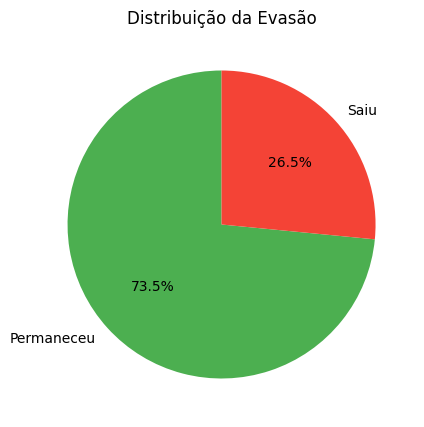

In [68]:
import matplotlib.pyplot as plt

# Contagem e proporção
evasao_counts = df_relevante['Evasao'].value_counts()
evasao_percent = df_relevante['Evasao'].value_counts(normalize=True) * 100

print(" Distribuição da Evasão:")
print(evasao_counts)
print("\n Proporção (%):")
print(evasao_percent.round(2))

# Gráfico de pizza
plt.figure(figsize=(5,5))
plt.pie(
    evasao_counts,
    labels=['Permaneceu', 'Saiu'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)
plt.title('Distribuição da Evasão')
plt.show()


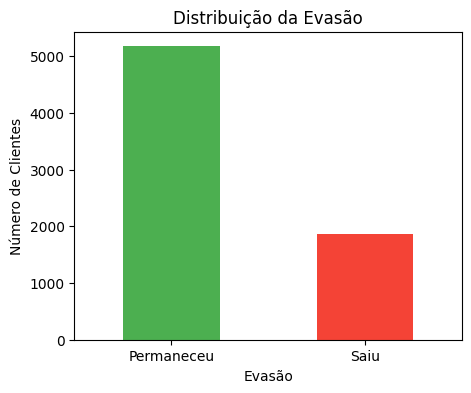

In [59]:
# Gráfico de barras
plt.figure(figsize=(5,4))
evasao_counts.plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Distribuição da Evasão')
plt.xlabel('Evasão')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Permaneceu', 'Saiu'], rotation=0)
plt.show()

# Contagem de Evasão por Variáveis Categóricas

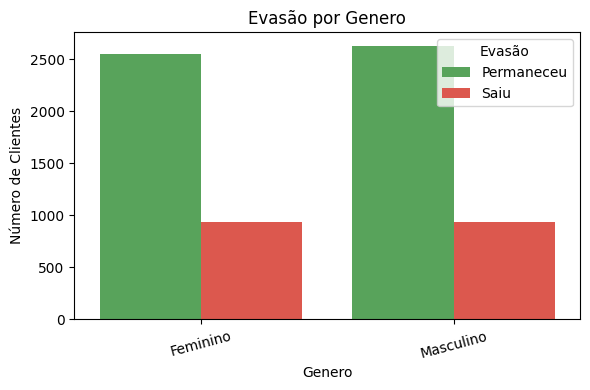

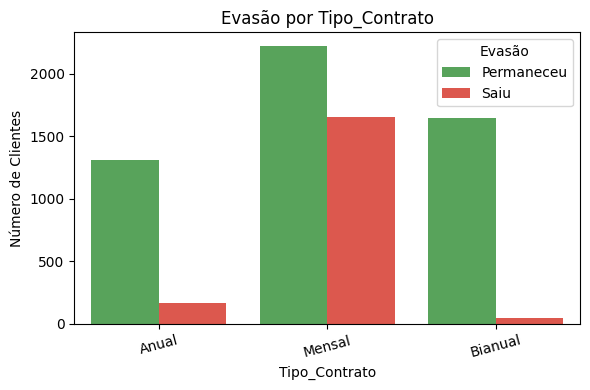

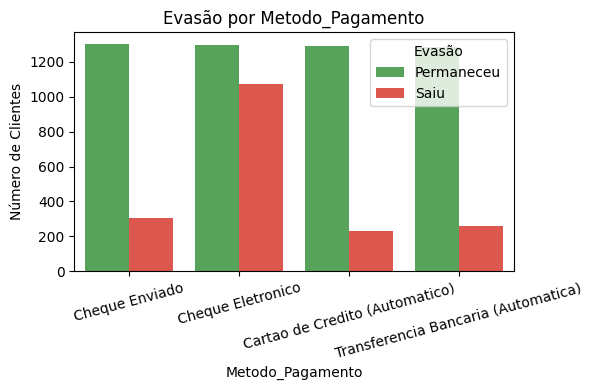

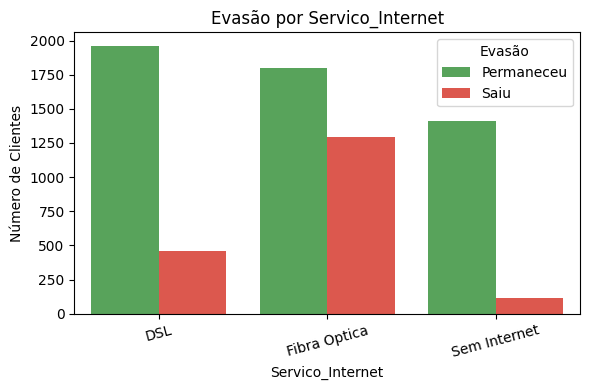


 Taxa de evasão por Genero:
Genero
Feminino     26.92
Masculino    26.16
Name: Evasao, dtype: float64

 Taxa de evasão por Tipo_Contrato:
Tipo_Contrato
Anual      11.27
Bianual     2.83
Mensal     42.71
Name: Evasao, dtype: float64

 Taxa de evasão por Metodo_Pagamento:
Metodo_Pagamento
Cartao de Credito (Automatico)         15.24
Cheque Eletronico                      45.29
Cheque Enviado                         19.11
Transferencia Bancaria (Automatica)    16.71
Name: Evasao, dtype: float64

 Taxa de evasão por Servico_Internet:
Servico_Internet
DSL             18.96
Fibra Optica    41.89
Sem Internet     7.40
Name: Evasao, dtype: float64


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis categóricas para analisar
variaveis_categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pagamento', 'Servico_Internet']

# Loop para gerar gráficos
for var in variaveis_categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_relevante, x=var, hue='Evasao', palette=['#4CAF50', '#F44336'])
    plt.title(f"Evasão por {var}")
    plt.xlabel(var)
    plt.ylabel("Número de Clientes")
    plt.legend(title='Evasão', labels=['Permaneceu', 'Saiu'])
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

    # Taxa de evasão por categoria (em %)
for var in variaveis_categoricas:
    taxa = df_relevante.groupby(var)['Evasao'].mean() * 100
    print(f"\n Taxa de evasão por {var}:")
    print(taxa.round(2))


# Contagem de Evasão por Variáveis Numéricas

/tmp/ipython-input-1825689540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevante, x='Evasao', y=var, palette=['#4CAF50', '#F44336'])


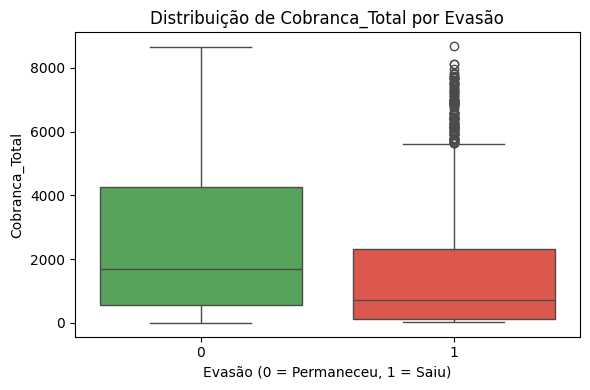

/tmp/ipython-input-1825689540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevante, x='Evasao', y=var, palette=['#4CAF50', '#F44336'])



 Estatísticas de Cobranca_Total por Evasão:
         count         mean          std    min    25%       50%      75%  \
Evasao                                                                      
0       5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1       1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

            max  
Evasao           
0       8672.45  
1       8684.80  


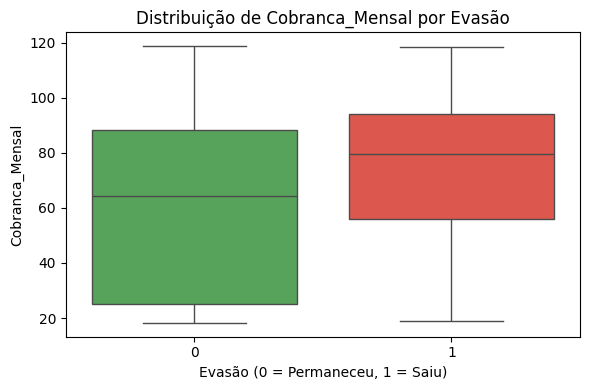


 Estatísticas de Cobranca_Mensal por Evasão:
         count       mean        std    min    25%     50%   75%     max
Evasao                                                                  
0       5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1       1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


/tmp/ipython-input-1825689540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevante, x='Evasao', y=var, palette=['#4CAF50', '#F44336'])


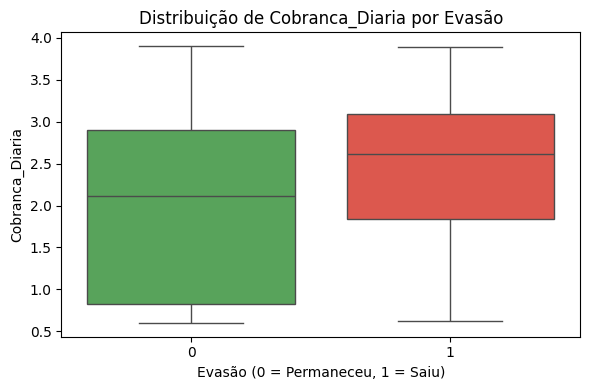


 Estatísticas de Cobranca_Diaria por Evasão:
         count      mean       std       min       25%       50%       75%  \
Evasao                                                                       
0       5174.0  2.012817  1.021524  0.599589  0.824641  2.116632  2.904312   
1       1869.0  2.445711  0.810384  0.619302  1.844764  2.616838  3.094867   

             max  
Evasao            
0       3.901437  
1       3.888296  


/tmp/ipython-input-1825689540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevante, x='Evasao', y=var, palette=['#4CAF50', '#F44336'])


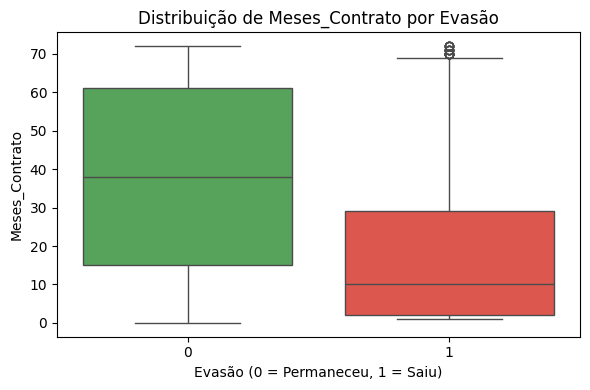


 Estatísticas de Meses_Contrato por Evasão:
         count       mean        std  min   25%   50%   75%   max
Evasao                                                           
0       5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1       1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [66]:
# Lista de variáveis numéricas para analisar
variaveis_numericas = ['Cobranca_Total', 'Cobranca_Mensal', 'Cobranca_Diaria', 'Meses_Contrato']

import matplotlib.pyplot as plt
import seaborn as sns

for var in variaveis_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_relevante, x='Evasao', y=var, palette=['#4CAF50', '#F44336'])
    plt.title(f"Distribuição de {var} por Evasão")
    plt.xlabel("Evasão (0 = Permaneceu, 1 = Saiu)")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

    # Estatísticas descritivas separadas
    print(f"\n Estatísticas de {var} por Evasão:")
    print(df_relevante.groupby('Evasao')[var].describe())

# Análise de Correlação de Variáveis

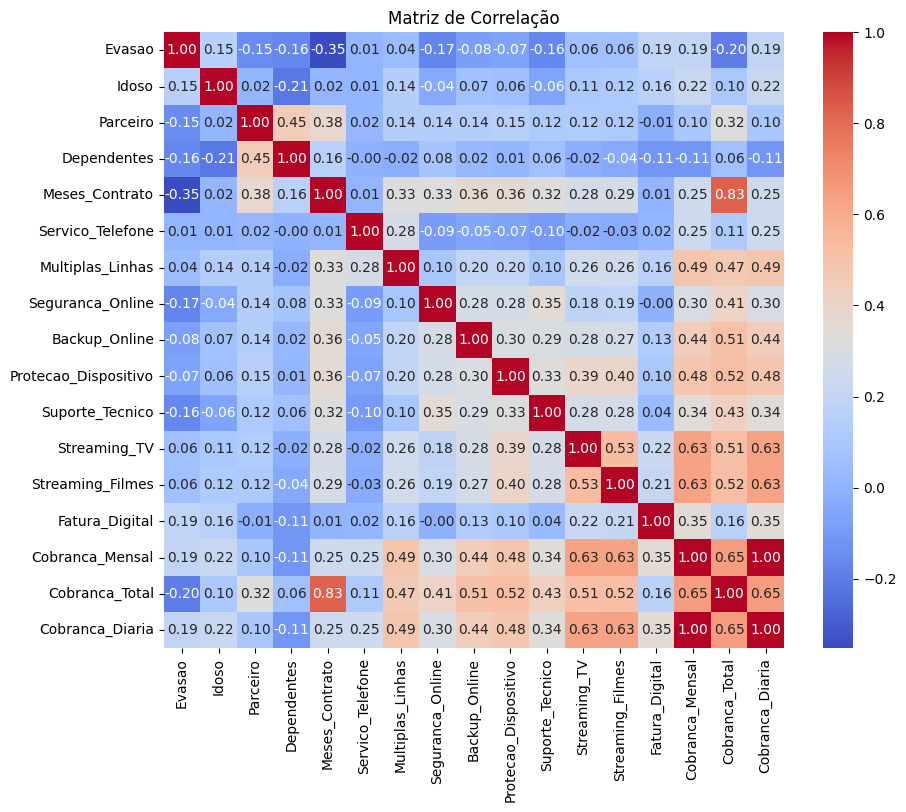

/tmp/ipython-input-1616022372.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevante, x='Evasao', y='Cobranca_Diaria', palette=['#4CAF50', '#F44336'])


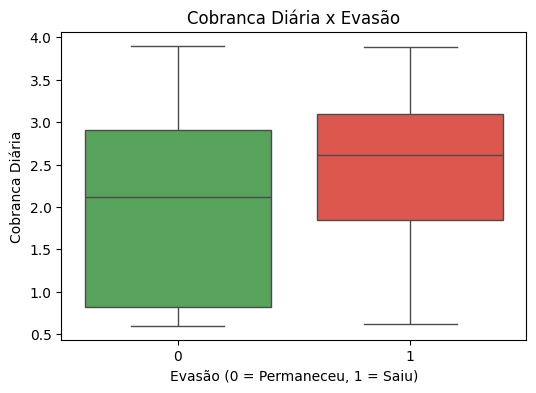

Correlação entre Cobranca_Diaria e Evasao:
0.19335642223784727


/tmp/ipython-input-1616022372.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevante, x='Evasao', y='Qtd_Servicos', palette=['#4CAF50', '#F44336'])


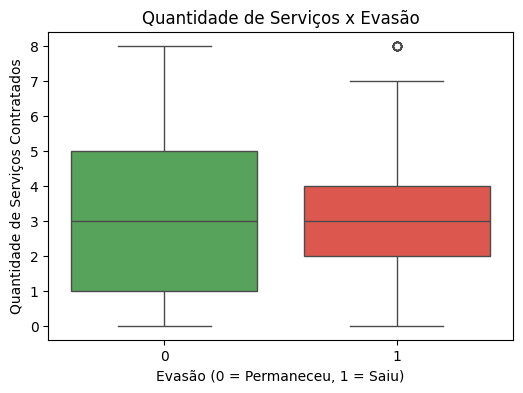

Correlação entre Qtd_Servicos e Evasao:
-0.06726396658825493


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlação geral das variáveis numéricas
correlacoes = df_relevante.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# 2. Relação entre Cobranca_Diaria e Evasao
plt.figure(figsize=(6,4))
sns.boxplot(data=df_relevante, x='Evasao', y='Cobranca_Diaria', palette=['#4CAF50', '#F44336'])
plt.title("Cobranca Diária x Evasão")
plt.xlabel("Evasão (0 = Permaneceu, 1 = Saiu)")
plt.ylabel("Cobranca Diária")
plt.show()

print("Correlação entre Cobranca_Diaria e Evasao:")
print(df_relevante[['Cobranca_Diaria', 'Evasao']].corr().iloc[0,1])

# 3. Quantidade de serviços contratados x Evasao
# Criar coluna contando quantos serviços o cliente possui (binários = 1/0)
servicos_cols = [
    'Servico_Telefone', 'Multiplas_Linhas', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes'
]
df_relevante['Qtd_Servicos'] = df_relevante[servicos_cols].sum(axis=1)

plt.figure(figsize=(6,4))
sns.boxplot(data=df_relevante, x='Evasao', y='Qtd_Servicos', palette=['#4CAF50', '#F44336'])
plt.title("Quantidade de Serviços x Evasão")
plt.xlabel("Evasão (0 = Permaneceu, 1 = Saiu)")
plt.ylabel("Quantidade de Serviços Contratados")
plt.show()

print("Correlação entre Qtd_Servicos e Evasao:")
print(df_relevante[['Qtd_Servicos', 'Evasao']].corr().iloc[0,1])


#📄Relatorio Final

# Relatório de Análise de Evasão de Clientes (Churn)
# 1. Introdução
O objetivo desse estudo é analisar os dados de clientes de uma empresa de telecomunicações para compreender o fenômeno da evasão (Churn).

O Churn ocorre quando clientes encerram o serviço contratado, gerando perdas de receita e aumento nos custos de aquisição de novos clientes.

Por meio dessa análise, buscamos identificar padrões e fatores que influenciam a evasão, com o intuito de propor ações estratégicas para reduzi-la.

# 2. Limpeza e Tratamento de Dados
As etapas de preparação dos dados incluíram:

- Importação dos dados a partir de um arquivo JSON fornecido pela API da Telecom X.

- Achatamento das colunas aninhadas (customer, phone, internet, account) para facilitar o manuseio.

Remoção de inconsistências:

- Substituição de "No internet service" e "No phone service" por "No".

- Conversão de Churn de "Yes"/"No" para 1/0.

- Conversão de todas as colunas binárias (Yes/No) para 1/0.

- Padronização e tradução dos nomes das colunas e categorias para português.

- Preenchimento dos valores ausentes em Cobranca_Total com 0 para clientes novos.

- Criação de variável derivada: Cobranca_Diaria = Cobranca_Mensal / 30.4375.

# 3. Análise Exploratória de Dados
A exploração dos dados incluiu:

## 3.1 Distribuição geral da evasão
Aproximadamente 26,5% dos clientes cancelaram o serviço.

Gráficos de pizza e barras mostraram o equilíbrio relativo entre clientes ativos e cancelados.

## 3.2 Evasão por variáveis categóricas
Clientes com contrato mensal apresentaram taxas de evasão significativamente mais altas.

Determinados métodos de pagamento, como Cheque Eletrônico, tiveram maior índice de churn.

O tipo de serviço de internet também apresentou influência: clientes com Fibra Óptica tiveram maior evasão que os de DSL.

## 3.3 Evasão por variáveis numéricas
Meses_Contrato: clientes com menos tempo de contrato tendem a cancelar mais.

Cobranca_Mensal: valores mensais mais altos estão relacionados a maior evasão.

Cobranca_Total: clientes com baixo gasto acumulado apresentam maior churn, reforçando que cancelamentos ocorrem cedo no ciclo de vida.

(Inserir aqui os gráficos que você já produziu: distribuição de churn, gráficos por categorias, boxplots das numéricas.)

# 4. Conclusões e Insights
Tempo de contrato é um fator crítico: clientes novos são mais propensos a sair.

Modelo de contrato influencia fortemente: contratos mensais têm churn muito maior que anuais ou bianuais.

Preço mensal elevado aumenta a probabilidade de evasão, possivelmente por sensibilidade ao preço.

Método de pagamento e tipo de internet também têm correlação relevante com churn.

A combinação de baixo tempo de contrato + alto valor mensal é o perfil mais crítico.

# 5. Análise Extra: Correlações
Foi feita uma análise de correlação entre variáveis numéricas e a evasão, com destaque para:

Cobranca_Diaria → correlação positiva com evasão; clientes com maior custo diário têm mais chance de cancelar.

Quantidade de Serviços Contratados → relação inversa com evasão; quanto mais serviços ativos, menor a probabilidade de saída.

A matriz de correlação permitiu identificar quais variáveis numéricas mais se associam ao churn, oferecendo base para futuros modelos preditivos.

# 6. Recomendações
Criar incentivos para contratos de longo prazo, como descontos ou benefícios adicionais.

Revisar estratégias de precificação para clientes novos ou sensíveis a preço.

Oferecer benefícios adicionais (suporte, upgrades, bônus) para clientes nos primeiros meses, reduzindo a chance de saída precoce.

Acompanhar de perto métodos de pagamento com alto churn, avaliando possíveis melhorias na experiência de cobrança.

Segmentar campanhas de retenção para clientes de alto risco (identificados pelo perfil encontrado na análise).
